In [1]:
import numpy as np
import pandas as pd

# cosine_similarity

In [2]:
readbook = pd.read_excel(r'vt_rulefillna_01_summary.xls',index_col=0)

In [44]:
readbook

,日期,倾向,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2019-1-1,1,0,0,0,0,0,0,0,0,0,0
1,2019-1-2,1,0,1,1,1,0,0,0,0,1,1
2,2019-1-3,1,0,1,1,1,1,1,0,0,1,1
3,2019-1-4,1,1,1,1,1,1,1,1,1,1,1
4,2019-1-5,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,2020-3-31,0,1,1,1,1,1,1,0,0,1,1
456,2020-4-1,0,0,1,1,0,1,1,1,1,1,1
457,2020-4-2,0,0,1,0,0,1,1,0,0,1,1
458,2020-4-3,0,0,1,0,0,1,1,0,0,1,1


In [45]:
X = np.array(readbook.iloc[:,1])[:-1]
len(X)

459

In [76]:
Y = np.array(readbook.iloc[:,11])[1:]
len(Y)

459

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
a = [X,Y]
cosine_similarity(a)

array([[1.        , 0.75669783],
       [0.75669783, 1.        ]])

# cross_entropy

In [14]:
#softmax
def softmax(L):
    expL = np.exp(L)
    sumExpl = np.sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpl)
    return result

In [4]:
#交叉熵公式，其中P表示股民评论倾向概率列表，Y表示次日股票其他因子的变化趋势倾向列表。
def cross_entropy(P,Y):
    P = np.float_(P)
    Y = np.float_(Y)
    return -np.sum(Y*np.log(P)+(1-Y)*np.log(1-P)) / len(P)

In [9]:
Y = pd.read_excel(r'vt_rulefillna_01_summary.xls',index_col=0)
X = pd.read_excel(r'vt_meanfillna_summary.xls',index_col=0)
name_list = X.columns.values
print(name_list)
X = np.array(X.iloc[:,1])[:-1]

['日期' '倾向' '开盘' '收盘' '最高' '最低' '涨跌幅' '涨跌额' '成交量' '成交额' '振幅' '换手率']


In [10]:
not_01_index = [i for i in range(len(X)) if (X[i] != 0 and X[i] != 1)]
X = X[not_01_index]
for j in range(2,12):
    Y_array = np.array(Y.iloc[:,j])[1:]
    Y_array = Y_array[not_01_index]
    factor_name = name_list[j]
    cs_result = cross_entropy(X,Y_array)
    print("股民情感倾向概率与%s交叉熵值：%f"%(factor_name,cs_result))

股民情感倾向概率与开盘交叉熵值：0.802711
股民情感倾向概率与收盘交叉熵值：0.835103
股民情感倾向概率与最高交叉熵值：0.827165
股民情感倾向概率与最低交叉熵值：0.789267
股民情感倾向概率与涨跌幅交叉熵值：0.827560
股民情感倾向概率与涨跌额交叉熵值：0.827560
股民情感倾向概率与成交量交叉熵值：0.840608
股民情感倾向概率与成交额交叉熵值：0.829050
股民情感倾向概率与振幅交叉熵值：0.718341
股民情感倾向概率与换手率交叉熵值：0.714569


In [42]:
data = pd.read_excel(r'vt_meanfillna_sub_summary.xls',index_col=0)
name_list = data.columns.values
print(name_list)
X = np.array(data.iloc[:,1])[:-1]
len(X)

['日期' '倾向' '开盘' '收盘' '最高' '最低' '涨跌幅' '涨跌额' '成交量' '成交额' '振幅' '换手率']


459

In [43]:
for j in range(2,12):
    Y_array = np.array(data.iloc[:,j])[1:]
    factor_name = name_list[j]
    cs_result = cross_entropy(softmax(X),softmax(Y_array))
    print("股民情感倾向概率与%s交叉熵值：%f"%(factor_name,cs_result))

股民情感倾向概率与开盘交叉熵值：0.015522
股民情感倾向概率与收盘交叉熵值：0.015627
股民情感倾向概率与最高交叉熵值：0.015650
股民情感倾向概率与最低交叉熵值：0.015548
股民情感倾向概率与涨跌幅交叉熵值：0.015588
股民情感倾向概率与涨跌额交叉熵值：0.015889
股民情感倾向概率与成交量交叉熵值：0.016338
股民情感倾向概率与成交额交叉熵值：0.014843
股民情感倾向概率与振幅交叉熵值：0.015588
股民情感倾向概率与换手率交叉熵值：0.015587


# machine_learning

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.svm import SVC,LinearSVC,LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import column_or_1d
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
seed = 666
degree = 2
alpha = 1e-4
epsilon = 1e-5

In [162]:
readbook1 = pd.read_excel(r'vt_st_rulefillna_summary.xls',index_col=0)
readbook1

,日期,倾向,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2019-1-1,0.243180,-2.539462,-2.744260,-2.702167,-2.648786,-0.827936,-0.535630,0.346401,-0.148423,0.016727,0.331160
1,2019-1-2,0.243180,-2.630455,-2.693132,-2.686902,-2.636679,-0.256188,-0.138072,0.133040,-0.289209,0.056207,0.125072
2,2019-1-3,0.243180,-2.721448,-2.642004,-2.671638,-2.624572,0.315561,0.259486,-0.080322,-0.429995,0.095687,-0.081017
3,2019-1-4,0.243180,-2.708157,-2.548951,-2.603456,-2.607420,0.477989,0.374274,0.622101,0.069516,0.494875,0.605944
4,2019-1-5,0.243180,-2.694866,-2.455898,-2.535275,-2.590268,0.640418,0.489062,1.324523,0.569027,0.894064,1.292905
...,...,...,...,...,...,...,...,...,...,...,...,...
455,2020-3-31,-1.477785,-1.002808,-1.073395,-1.056652,-1.030474,0.118481,0.125100,-0.509776,-0.608363,-0.097327,-0.510367
456,2020-4-1,-0.617302,-1.116294,-1.058057,-1.044440,-1.041572,0.159629,0.161496,-0.298503,-0.425620,0.047433,-0.304279
457,2020-4-2,-1.477785,-1.177637,-1.022267,-1.125851,-1.156589,0.220269,0.217491,-0.370641,-0.499990,0.262381,-0.372975
458,2020-4-3,-0.617302,-1.238980,-0.986478,-1.207262,-1.271607,0.280909,0.273485,-0.442779,-0.574360,0.477329,-0.441671


In [163]:
y = readbook1.iloc[:,6]
Y = []
for i in range(len(y)):
    if(y[i]<0):
        Y.append(0)
    else:
        Y.append(1)
Y = np.array(Y[1:])
len(Y)

459

In [164]:
X = np.array(readbook1.iloc[:-1,1:])
X[np.isnan(X)] = 0.1
X

array([[ 0.24317977, -2.53946228, -2.74425963, ..., -0.14842325,
         0.01672662,  0.33115982],
       [ 0.24317977, -2.63045511, -2.6931316 , ..., -0.28920894,
         0.05620678,  0.12507163],
       [ 0.24317977, -2.72144794, -2.64200356, ..., -0.42999463,
         0.09568695, -0.08101655],
       ...,
       [-0.61730248, -1.11629354, -1.05805695, ..., -0.42561993,
         0.04743341, -0.30427875],
       [-1.47778473, -1.17763702, -1.02226732, ..., -0.49998978,
         0.26238097, -0.37297481],
       [-0.61730248, -1.2389805 , -0.9864777 , ..., -0.57435962,
         0.47732853, -0.44167087]])

In [165]:
X2 = np.array(readbook1.iloc[:-1,2:])
X2[np.isnan(X2)] = 0.1
X2

array([[-2.53946228, -2.74425963, -2.70216679, ..., -0.14842325,
         0.01672662,  0.33115982],
       [-2.63045511, -2.6931316 , -2.68690227, ..., -0.28920894,
         0.05620678,  0.12507163],
       [-2.72144794, -2.64200356, -2.67163775, ..., -0.42999463,
         0.09568695, -0.08101655],
       ...,
       [-1.11629354, -1.05805695, -1.04444027, ..., -0.42561993,
         0.04743341, -0.30427875],
       [-1.17763702, -1.02226732, -1.12585102, ..., -0.49998978,
         0.26238097, -0.37297481],
       [-1.2389805 , -0.9864777 , -1.20726178, ..., -0.57435962,
         0.47732853, -0.44167087]])

In [147]:
def choose_best_model(x,y):
    pipelines = []
    pipelines.append(
        ('SVC',
         Pipeline([
             ("SVC", SVC(random_state=seed))
         ])
         )
    )
    pipelines.append(
        ('AdaBoostClassifier',
         Pipeline([
             ('AdaBoostClassifier', AdaBoostClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('RandomForestClassifier',
         Pipeline([
             ('RandomForestClassifier', RandomForestClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('LinearSVC',
         Pipeline([
             ('LinearSVC', LinearSVC(random_state=seed))
         ]))
    )
    pipelines.append(
        ('KNeighborsClassifier',
         Pipeline([
             ('KNeighborsClassifier', KNeighborsClassifier())
         ]))
    )

    pipelines.append(
        ('GaussianNB',
         Pipeline([
             ('GaussianNB', GaussianNB())
         ]))
    )

    pipelines.append(
        ('Perceptron',
         Pipeline([
             ('Perceptron', Perceptron(random_state=seed))
         ]))
    )
    pipelines.append(
        ('SGDClassifier',
         Pipeline([
             ('SGDClassifier', SGDClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('DecisionTreeClassifier',
         Pipeline([
             ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('VotingClassifier',
         VotingClassifier(estimators=[
             ('log_reg',LogisticRegression()),
             ('svc_clf',SVC(probability=True)),
             ('dt_clf',DecisionTreeClassifier(random_state=seed))
         ],voting='soft'))
    )
    pipelines.append(
        ('BaggingClassifier',
         BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,max_samples=100,
                           bootstrap=True))
    )
    n_folds = 5
    #模型准确率、模型名字、最佳精准率、最佳召回率、最佳f1-score
    accuracies, names ,precisions,recalls,f1_scores= [],[],[],[],[]
    for name, model in pipelines:
        #定义kfold
        kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
        #定义临时值
        accuracy_res = []
        precision_res = []
        recall_res = []
        f1score_res = []
        #开始训练
        for train_index,test_index in kfold.split(x):
            #划分数据集
            x_train = x[train_index]
            y_train = np.array(y)[train_index]
            x_test = x[test_index]
            y_test = y[test_index]
            #训练
            model.fit(x_train,y_train)
            #计算准确率
            acc = model.score(x_test,y_test)
            accuracy_res.append(acc)
            y_pred = model.predict(x_test)
            #精准率、召回率、f1_score计算
            ps = precision_score(y_test,y_pred)
            rs = recall_score(y_test,y_pred)
            fs = f1_score(y_test,y_pred)
            precision_res.append(ps)
            recall_res.append(rs)
            f1score_res.append(fs)
        #模型名称与最佳准确率、精准率、召回率、f1-score打包输出
        accuracies.append(np.max(accuracy_res))
        precisions.append(np.max(precision_res))
        recalls.append(np.max(recall_res))
        f1_scores.append(np.max(f1score_res))
        names.append(name)
    return [zip(names,accuracies),zip(names,precisions),
            zip(names,recalls),zip(names,f1_scores)]

In [150]:
temp = choose_best_model(X2,Y)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [151]:
for i in temp:
    if(i==temp[0]):
        print("各分类器准确率：")
    elif(i==temp[1]):
        print("各分类器精准率：")
    elif(i==temp[2]):
        print("各分类器召回率：")
    elif(i==temp[3]):
        print("各分类器f1-score：")
    for j in i:
        print(j)
    print("\n")

各分类器准确率：
('SVC', 0.7065217391304348)
('AdaBoostClassifier', 0.6956521739130435)
('RandomForestClassifier', 0.6956521739130435)
('LinearSVC', 0.717391304347826)
('KNeighborsClassifier', 0.6847826086956522)
('GaussianNB', 0.6956521739130435)
('Perceptron', 0.6593406593406593)
('SGDClassifier', 0.6195652173913043)
('DecisionTreeClassifier', 0.6630434782608695)
('VotingClassifier', 0.6739130434782609)
('BaggingClassifier', 0.717391304347826)


各分类器精准率：
('SVC', 0.72)
('AdaBoostClassifier', 0.7333333333333333)
('RandomForestClassifier', 0.717391304347826)
('LinearSVC', 0.72)
('KNeighborsClassifier', 0.7213114754098361)
('GaussianNB', 0.7083333333333334)
('Perceptron', 0.75)
('SGDClassifier', 0.6865671641791045)
('DecisionTreeClassifier', 0.7090909090909091)
('VotingClassifier', 0.7222222222222222)
('BaggingClassifier', 0.7419354838709677)


各分类器召回率：
('SVC', 0.9285714285714286)
('AdaBoostClassifier', 0.8490566037735849)
('RandomForestClassifier', 0.8867924528301887)
('LinearSVC', 0.9642857142

In [166]:
#confusion_metric with RandomForestClassifier
def confusion_metrics(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=seed)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return confusion_matrix(y_pred,y_test)

In [170]:
confusion_metrics(LinearSVC(random_state=seed),X2,Y)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[ 6,  3],
       [42, 64]], dtype=int64)

In [91]:
import matplotlib.pyplot as plt

In [160]:
def canvas(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=seed)
    pipelines = []

    pipelines.append(
        ('AdaBoostClassifier',
         Pipeline([
             ('AdaBoostClassifier', AdaBoostClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('RandomForestClassifier',
         Pipeline([
             ('RandomForestClassifier', RandomForestClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('KNeighborsClassifier',
         Pipeline([
             ('KNeighborsClassifier', KNeighborsClassifier())
         ]))
    )

    pipelines.append(
        ('GaussianNB',
         Pipeline([
             ('GaussianNB', GaussianNB())
         ]))
    )
    pipelines.append(
        ('DecisionTreeClassifier',
         Pipeline([
             ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=seed))
         ]))
    )
    pipelines.append(
        ('VotingClassifier',
         VotingClassifier(estimators=[
             ('log_reg',LogisticRegression()),
             ('svc_clf',SVC(probability=True)),
             ('dt_clf',DecisionTreeClassifier(random_state=seed))
         ],voting='soft'))
    )
    pipelines.append(
        ('BaggingClassifier',
         BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,max_samples=100,
                           bootstrap=True))
    )
    fig = plt.figure()
    plt.subplots_adjust(2.5,15,5,18,0.2,0.2)
    for i,(name,model) in enumerate(pipelines):
        y_score = model.fit(x_train,y_train).predict_proba(x_test)
        fprs,tprs,thresholds=roc_curve(y_test,y_score[:,1])
        ax1 = fig.add_subplot(int('33'+str(i+1)))
        ax1.set_title(name,fontsize=20)
        ax1.plot(fprs,tprs)
    plt.show()
    for i,(name,model) in enumerate(pipelines):
        y_score = model.fit(x_train,y_train).predict_proba(x_test)
        ras = roc_auc_score(y_test,y_score[:,1])
        print("模型%s的AUC值为：%f"%(name,ras))

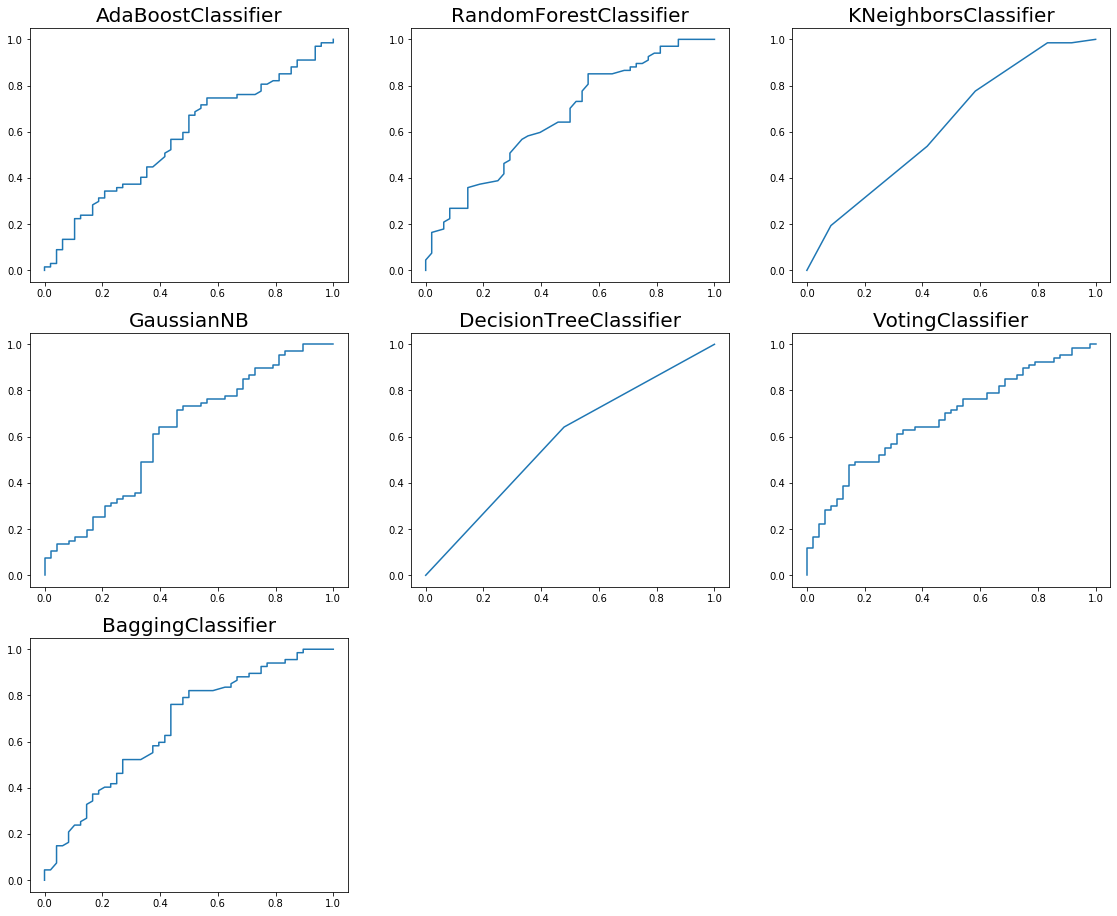

模型AdaBoostClassifier的AUC值为：0.572295
模型RandomForestClassifier的AUC值为：0.663091
模型KNeighborsClassifier的AUC值为：0.624378
模型GaussianNB的AUC值为：0.616915
模型DecisionTreeClassifier的AUC值为：0.581312
模型VotingClassifier的AUC值为：0.677861
模型BaggingClassifier的AUC值为：0.667600


In [161]:
canvas(X2,Y)